# Ex09 Predicción de series de tiempo (LSTM)


## 1. Preliminares

Constantemente las empresas se enfrentan al reto de pronosticar en el tiempo su actividad económica. Por ejemplo, pronósticar ventas, utilidades, inversiones y costos, entre otros. Lo anterior constituyen elementos esenciales para la planificación de los negocios; sin embargo para realizar los pronósticos, se necesita conocer y disponer de información confiable y suficiente del pasado; estudiarla y detectar tendencias, variaciones cíclicas y estaciónales, con el fin de poderlas reproducir a través de métodos clásicos basados en la estadística.


#### 1.1 Métodos cuantitativos para pronósticar

Estas técnicas necesitan el estudio de información histórica para estimar los valores futuros de la variable de interés. Estos modelos se pueden agrupar en dos clases: univariados y causales.

##### 1.1.1 Modelos univariados

Predicen el futuro de una serie con base en su comportamiento histórico propio; son muy útiles si el patrón detectado en el pasado se mantiene hacia el futuro, de lo contrario no son aconsejables. Los modelos integrated autoregressive moving average model (ARIMA model) son representativos de este grupo.

##### 1.1.2 Modelos causales

Requieren la identificación de otras variables que se relacionan de la manera causa efecto con la variable que se desea predecir. Una vez identificadas estas variables relacionadas, se construye un modelo estadístico que pretende describir la relación entre estas variables y la variable que se desea pronosticar. Los modelos de re- gresión lineal simple y los modelos de regresión lineal múltiple son los más conocidos de este grupo.

#### 2.1 Naturaleza de las series de tiempo

Una serie de tiempo es una serie de registros realizados en diversos periodos de tiempo (días, semanas, meses, trimestres, años). Los registros son valores numéricos que varían en el tiempo. Un aspecto básico del estudio de las series de tiempo requiere analizar la naturaleza de estas variaciones [].

Las variaciones de una serie de tiempo (ST) se clasifican en `sistemáticas` y `aleatorias`; las sistemáticas ocurren con regularidad y se pueden modelar; las aleatorias son causadas por situaciones aisladas como terremotos, huelgas y en consecuencia, son difíciles de modelar.

Los economistas han identificado tres diferentes tipos de variaciones: `tendencia secular`, `variaciones cíclicas` y `variaciones estacionales`.

- La `tendencia secular` describe la naturaleza general de la serie en periodos largos de tiempo y son debidas a fuerzas importantes como crecimiento de la población, cambios en tecnología y en los hábitos de consumo de los consumidores, entre otras. Estas situaciones pueden desembocar en tendencias ascendentes, descendentes e incluso ninguna. Veamos un ejemplo de este tipo de tendencias:

<img src="images/tendencia_secular.png" style="width:400;height:250px;">
<caption><center> Figura 1: Ciclo de ondas de Kondratieff </center></caption>

- Las `variaciones cíclicas` corresponden a fluctuaciones de largo plazo, más o menos periódicas que se repiten regularmente cada cierto número de años, en las actividades económicas en periodos de crisis y de recuperación.

<img src="images/variacion_ciclica.png" style="width:300;height:190px;">
<caption><center> Figura 2: Exportaciones de la empres $P&P$ </center></caption>



- Las `variaciones estacionales` se efectúan cuando las observaciones son realizadas en intervalos inferiores a un año (semanas, meses, trimestres); estas pueden reflejar comportamientos estacionales que se repiten de la misma manera y con la misma regularidad año tras año. El término estacional proviene de los países con estaciones; estas pueden influir en la evolución de los negocios; pueden depender de las costumbres y hábitos que se manifiestan durante el año. La demanda de útiles escolares, es un ejemplo claro:

<img src="images/variacion_estacional.png" style="width:300;height:190px;">
<caption><center> Figura 3: Demanda de útiles escolares durante el año </center></caption>


## 2. Descripción de la actividad

En esta actividad, utilizaremos redes LSTM utilizando la librería de Keras para abordar un problema de predicción de series de tiempo.

***Objetivo de aprendizaje***

Al completar esta actividad, sabrá cómo implementar y aplicar modelos basados en redes LSTM a problemas de predicción de series de tiempo.

***Etapas de la actividad***

La actividad se encuentra organizada en las siguientes etapas:

- Exploración de datos.
- Desarrollo de la red LSTM y entrenamiento
- Uso de la red LSTM para realizar predicciones


### 2.1 Descripción del problema

El problema que abordaremos en esta actividad es el problema de la predicción de pasajeros de aerolíneas internacionales. En donde, dado un año y un mes, el objetivo es predecir el número de pasajeros de aerolíneas internacionales en unidades de 1,000. Los datos que se proporcionan para resolver el problema van desde enero de 1949 hasta diciembre de 1960 (12 años), con 144 observaciones. Las datos se encuentran en el archivo: `passengers.csv`.

Veamos un ejemplo del contenido del archivo:

| Month | Passengers |
| --- | --- |
| 1949-01 | 112 |
| 1949-02 | 118 |
| 1949-03 | 132 |
| 1949-04 | 129 |
| 1949-05 | 121 |

## 3. Exploración de datos

Para comenzar con la actividad, carguemos el conjunto de datos. En este problema en particular, dado que cada observación está separada por el mismo intervalo de un mes, no nos interesa la fecha. Así, cuando carguemos el conjunto de datos, podemos excluir la primera columna.

Para cargar los datos, podría utilizar el siguiente método de la librería Pandas:

`pandas.read_csv(file_path, usecols=[1], engine='python')`

Una vez cargados los datos, podemos graficar fácilmente todo el conjunto de datos.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[]

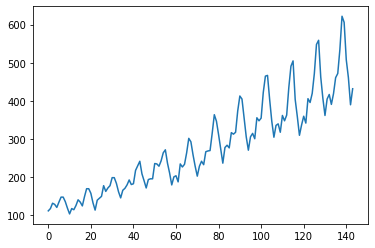

In [1]:


import pandas
import matplotlib.pyplot as plt
# Utilice Pandas u otra librería para cargar los datos y graficarlos
from google.colab import drive
drive.mount('/content/gdrive')

dataset = pandas.read_csv("/content/gdrive/My Drive/Colab Notebooks/passengers.csv", usecols=[1],engine='python')
plt.plot(dataset)
plt.plot()





***Salida esperada***:

<img src="images/passengers.png" style="width:400;height:250px;">
<caption><center> Figura 4: Pasajeros de aerolíneas internacionales </center></caption>

¿Qué podemos observar respecto a la serie en el tiempo?

- Se observa una tendencia al alza.
- También puede ver cierta periodicidad en los datos.

De momento vamos a trabajar con los datos tal como están. Sin embargo, normalmente es necesario utilizar técnicas de preprocesamiento de los datos que podrían incluir: transformaciones, normalización, etc.

## 4. Construcción de la red LSMT

En lugar de neuronas, las redes LSTM tienen bloques de memoria (también llamadas, celdas o unidades) que están conectados a través de capas. Recordemos que en cada celda se encuentran tres tipos de puertas/reglas:

- Forget gate: condicionalmente decide qué información olvidar.
- Update gate: condicionalmente decide qué valores de la entrada utilizar para actualizar el estado de la memoria.
- Output gate: condicionalmente decide qué sale en función de la entrada y la memoria de la celda.

Cada celda es como una mini-máquina de estados donde las puertas/reglas de las celdas tienen pesos que se aprenden durante la etapa de entrenamiento.

<img src="images/celda_lstm.png" style="width:500;height:400px;">
<caption><center> Figura 5: Celda de una red LSMT </center></caption>

### 4.1 Red LSTM para regresión

Para comenzar con el modelo de nuestra red LSTM, podríamos formular el problema como un problema de regresión. Es decir, dado el número de pasajeros (en unidades de miles) este mes, ¿cuál es el número de pasajeros el próximo mes?

Podemos escribir una función simple para convertir nuestra única columna de datos en un conjunto de datos de dos columnas: la primera columna que contiene el recuento de pasajeros de este mes (t) y la segunda columna que contiene el recuento de pasajeros del próximo mes (t + 1), que se preverá.

Antes de comenzar, primero importemos todas las funciones y clases que pretendemos utilizar. Esto supone un entorno de trabajo SciPy con la biblioteca de aprendizaje profundo Keras instalada.

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error



Using TensorFlow backend.


Antes de hacer nada, es una buena idea definir una semilla de números aleatorios para garantizar que nuestros resultados sean reproducibles.

In [0]:
# fijar una semilla para los números aleatorios, para poder reproducir los resultados
numpy.random.seed(4)

También podemos usar el código de la sección anterior para cargar el conjunto de datos como un dataframe de Pandas. Luego podemos extraer la arreglo NumPy del dataframe y convertir los valores enteros a valores reales, que son más adecuados para modelar con una red neuronal.

In [0]:
# Cargar el dataset
dataframe = pandas.read_csv("/content/gdrive/My Drive/Colab Notebooks/passengers.csv", usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

Los LSTM son sensibles a la escala de los datos de entrada, específicamente cuando se utilizan las funciones de activación `sigmoid` (predeterminada) o `tanh`. Puede ser una buena práctica reescalar los datos al rango de 0 a 1, también llamado normalización. Podemos normalizar fácilmente el conjunto de datos utilizando la clase de preprocesamiento `MinMaxScaler()` de la librería `scikit-learn`.

In [0]:
# normalizar el dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)



Después de modelar nuestros datos y estimar la exactitud de nuestro modelo en el conjunto de datos de entrenamiento, necesitamos tener una idea de la exactidud del modelo en nuevos datos no vistos. Un método simple que podemos utilizar es dividir el conjunto de datos ordenado en conjuntos de datos de entramiento y prueba. Escribamos un pequeño script que separe los datos en los conjuntos de datos de entrenamiento con el 67% de las observaciones, dejando el 33% restante para probar el modelo.

In [6]:
# dividir el dataset en un conjunto de entrenamiento y otro de pruebas
train_size = int(len(dataset)*0.67)
test_size = len(dataset)-train_size
train = dataset[0:train_size]
test = dataset[train_size:len(dataset),:]

print(f"len(train) = {len(train)}")
print(f"len(test) = {len(test)}")

len(train) = 96
len(test) = 48


***Salida esperada***:

`len(train) = 96`

`len(test) = 48`

Ahora definamos una función para crear un nuevo conjunto de datos, de manera no normalizada el conjunto de datos debería tener la siguiente estructura:

| X | Y |
| --- | --- |
112 | 118 |
| 118 | 132 |
| 132 | 129 |
| 129 | 121 |

Si compara estas primeras 4 filas con la muestra del conjunto de datos original que figura en la sección anterior, puede ver el patrón X = ty Y = t + 1 en los números.


La función debe tomar dos argumentos: el conjunto de datos, que es un arreglo NumPy que queremos convertir en un conjunto de datos, y el `look_back`, que es el número de pasos de tiempo anteriores para usar como variables de entrada para predecir el próximo período de tiempo, en este caso predeterminado a 1.

Este valor predeterminado creará un conjunto de datos donde X es el número de pasajeros en un momento dado (t) e Y es el número de pasajeros en la próxima vez (t + 1).

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return (numpy.array(dataX), numpy.array(dataY))

Usemos esta función para preparar el tren y probar conjuntos de datos para el modelado.

In [0]:
# redimensionar en X=t and Y=t+1, utilizando la función create_dataset
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

La red LSTM espera que los datos de entrada `X` se proporcionen con una estructura de matriz específica: [samples, time steps, features].

Actualmente, nuestros datos están en la forma: [samples, features] y estamos enmarcando el problema como un paso de tiempo para cada muestra. Podemos transformar el conjunto de datos de entrenamiento y prueba en la estructura esperada usando numpy.reshape () de la siguiente manera:

In [9]:
# redimensionar la entrada para que sea [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(f"trainX.shape:{trainX.shape}")
print(f"testX.shape:{testX.shape}")

print(f"trainY.shape:{trainY.shape}")
print(f"testY.shape:{testY.shape}")

trainX.shape:(94, 1, 1)
testX.shape:(46, 1, 1)
trainY.shape:(94,)
testY.shape:(46,)


Ahora estamos listos para diseñar y adaptar nuestra red LSTM para este problema. La red deberá tener una capa visible con 1 entrada, una capa oculta con 4 bloques LSTM, y una capa de salida que hace una predicción de un solo valor.

Se utiliza la función de activación `sigmoid` (valor predeterminado) para los bloques LSTM. La red deberá ser entrenada durante 100 épocas y utilizar un tamaño de batch de 1.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





 - 1s - loss: 0.0498
Epoch 2/100
 - 0s - loss: 0.0238
Epoch 3/100
 - 0s - loss: 0.0175
Epoch 4/100
 - 0s - loss: 0.0159
Epoch 5/100
 - 0s - loss: 0.0149
Epoch 6/100
 - 0s - loss: 0.0140
Epoch 7/100
 - 0s - loss: 0.0129
Epoch 8/100
 - 0s - loss: 0.0117
Epoch 9/100
 - 0s - loss: 0.0107
Epoch 10/100
 - 0s - loss: 0.0096
Epoch 11/100
 - 0s - loss: 0.0084
Epoch 12/100
 - 0s - loss: 0.0072
Epoch 13/100
 - 0s - loss: 0.0059
Epoch 14/100
 - 0s - loss: 0.0048
Epoch 15/100
 - 0s - loss: 0.0040
Epoch 16/100
 - 0s - loss: 0.0032
Epoch 17/100
 - 0s - loss: 0.0027
Epoch 18/100
 - 0s - loss: 0.0024
Epoch 19/100
 - 0s - loss: 0.0023
Epoch 20/100
 - 0s - loss: 0.0022
Epoch 21/100
 - 0s - loss: 0.0022
Epoch 22/100
 - 0s - loss: 0.0021
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0021
Epoch 25/100
 - 0s - loss: 0.0021
Epoch 26/100
 - 0s - loss: 0.0020
Epoch 27/100
 - 0s 

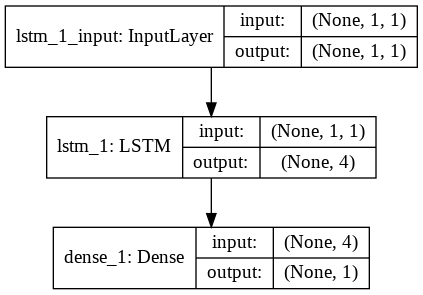

In [10]:
# crear y entrenar la red LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')     #Configura el modelo para entrenar
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

print(model.summary())

plot_model(model, to_file="/content/gdrive/My Drive/Colab Notebooks/model_LSTM.png", show_shapes=True, show_layer_names=True)

# New Section

Una vez que el modelo se entrene, podemos estimar el rendimiento del modelo con los datos de entrenamiento y con los datos de prueba. Esto nos dará un punto de comparación para los nuevos modelos.

In [11]:
# Realizar predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Aplicar escalar original
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calcular la raiz del error cuadrado medio
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#RMSE = raiz del error cuadrado medio
print('Train Score: %.2f RMSE' % (trainScore))


testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.28 RMSE
Test Score: 49.80 RMSE


***Salida esperada***:

`Train Score: 22.92 RMSE`

`Test Score: 47.53 RMSE`

Finalmente, podemos generar predicciones utilizando el modelo tanto para el tren como para el conjunto de datos de prueba para obtener una indicación visual de la habilidad del modelo.

Debido a que se preparó el conjunto de datos, debemos cambiar las predicciones para que se alineen en el eje x con el conjunto de datos original. Una vez preparados, los datos se trazan, mostrando el conjunto de datos original en azul, las predicciones para el conjunto de datos de entrenamiento en verde y las predicciones en el conjunto de datos de prueba invisible en rojo.

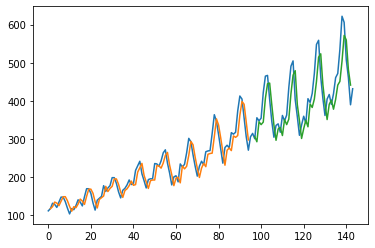

In [12]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

***Salida esperada***:

<img src="images/predictions_1.png" style="width:450;height:250px;">
<caption><center> Figura 6: Predicciones de pasajeros en aerolíneas internacionales </center></caption>

Podemos ver que el modelo hizo un excelente trabajo al ajustar tanto la formación como los conjuntos de datos de prueba.

### 4.2 Red LSTM para regresión utilizando una ventana

También podemos formular el problema para que se puedan usar múltiples step-times recientes para hacer la predicción del próximo step-time. A esto se le llama ventana, y el tamaño de la ventana es un parámetro que se puede ajustar para cada problema.

Por ejemplo, dado el instante actual (t) queremos predecir el valor del próximo instante en la secuencia (t+1), podemos utilizar el instante actual (t), así como los dos instantes anteriores (t-1 y t-2) como variables de entrada. Cuando se formula como un problema de regresión, las variables de entrada son t-2, t-1, t y la variable de salida es t + 1.

La función `create_dataset()` que creamos en la sección anterior nos permite crear esta formulación del problema de series de tiempo al aumentar el argumento `look_back` de 1 a 3.

Una muestra del conjunto de datos con esta formulación tendría el siguiente aspecto:

| X1 | X2 | X3 | Y
| --- | --- | --- | --- |
| 112 | 118 | 132 | 129 |
| 118 | 132 | 129 | 121 |
| 132 | 129 | 121 | 135 |
| 129 | 121 | 135 | 148 |


Utilicemos como base el código de la sección anterior con el tamaño de ventana más grande (por ejemplo: 3, 10, 20). Compare los resultados con el modelo anterior y dialogue con sus compañeros de grupo sobre los resultados.

trainX.shape:(91, 1, 4)
testX.shape:(43, 1, 4)
trainY.shape:(91,)
testY.shape:(43,)
Epoch 1/100
 - 1s - loss: 0.0449
Epoch 2/100
 - 0s - loss: 0.0208
Epoch 3/100
 - 0s - loss: 0.0135
Epoch 4/100
 - 0s - loss: 0.0113
Epoch 5/100
 - 0s - loss: 0.0101
Epoch 6/100
 - 0s - loss: 0.0093
Epoch 7/100
 - 0s - loss: 0.0083
Epoch 8/100
 - 0s - loss: 0.0075
Epoch 9/100
 - 0s - loss: 0.0068
Epoch 10/100
 - 0s - loss: 0.0063
Epoch 11/100
 - 0s - loss: 0.0058
Epoch 12/100
 - 0s - loss: 0.0053
Epoch 13/100
 - 0s - loss: 0.0051
Epoch 14/100
 - 0s - loss: 0.0047
Epoch 15/100
 - 0s - loss: 0.0045
Epoch 16/100
 - 0s - loss: 0.0044
Epoch 17/100
 - 0s - loss: 0.0043
Epoch 18/100
 - 0s - loss: 0.0042
Epoch 19/100
 - 0s - loss: 0.0040
Epoch 20/100
 - 0s - loss: 0.0039
Epoch 21/100
 - 0s - loss: 0.0039
Epoch 22/100
 - 0s - loss: 0.0038
Epoch 23/100
 - 0s - loss: 0.0037
Epoch 24/100
 - 0s - loss: 0.0036
Epoch 25/100
 - 0s - loss: 0.0036
Epoch 26/100
 - 0s - loss: 0.0035
Epoch 27/100
 - 0s - loss: 0.0034
Epoch 2

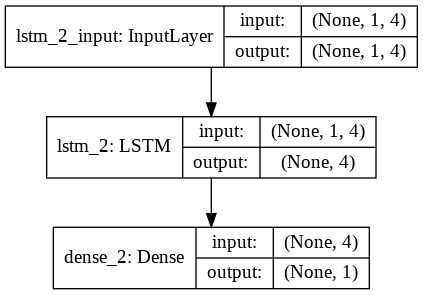

In [13]:
#@title Default title text
# LSTM for international airline passengers problem with window regression framing

look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(f"trainX.shape:{trainX.shape}")
print(f"testX.shape:{testX.shape}")

print(f"trainY.shape:{trainY.shape}")
print(f"testY.shape:{testY.shape}")

model = Sequential()
model.add(LSTM(4, input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')     #Configura el modelo para entrenar
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


print(model.summary())

#plot_model(model, to_file="/content/gdrive/My Drive/Colab Notebooks/model_LSTM.png", show_shapes=True, show_layer_names=True)

# Realizar predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Aplicar escalar original
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calcular la raiz del error cuadrado medio
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#RMSE = raiz del error cuadrado medio
print('Train Score: %.2f RMSE' % (trainScore))


testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


Train Score: 23.33 RMSE
Test Score: 68.17 RMSE


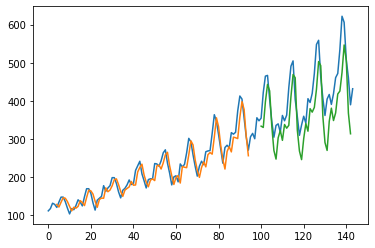

trainX.shape:(85, 1, 10)
testX.shape:(37, 1, 10)
trainY.shape:(85,)
testY.shape:(37,)
Epoch 1/100
 - 1s - loss: 0.0123
Epoch 2/100
 - 0s - loss: 0.0066
Epoch 3/100
 - 0s - loss: 0.0063
Epoch 4/100
 - 0s - loss: 0.0061
Epoch 5/100
 - 0s - loss: 0.0060
Epoch 6/100
 - 0s - loss: 0.0056
Epoch 7/100
 - 0s - loss: 0.0053
Epoch 8/100
 - 0s - loss: 0.0053
Epoch 9/100
 - 0s - loss: 0.0050
Epoch 10/100
 - 0s - loss: 0.0050
Epoch 11/100
 - 0s - loss: 0.0049
Epoch 12/100
 - 0s - loss: 0.0048
Epoch 13/100
 - 0s - loss: 0.0046
Epoch 14/100
 - 0s - loss: 0.0046
Epoch 15/100
 - 0s - loss: 0.0046
Epoch 16/100
 - 0s - loss: 0.0043
Epoch 17/100
 - 0s - loss: 0.0043
Epoch 18/100
 - 0s - loss: 0.0042
Epoch 19/100
 - 0s - loss: 0.0041
Epoch 20/100
 - 0s - loss: 0.0040
Epoch 21/100
 - 0s - loss: 0.0038
Epoch 22/100
 - 0s - loss: 0.0039
Epoch 23/100
 - 0s - loss: 0.0037
Epoch 24/100
 - 0s - loss: 0.0037
Epoch 25/100
 - 0s - loss: 0.0036
Epoch 26/100
 - 0s - loss: 0.0037
Epoch 27/100
 - 0s - loss: 0.0035
Epoch

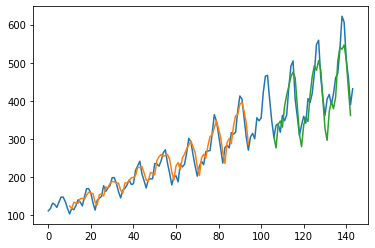

In [15]:
#@title Default title text
# LSTM for international airline passengers problem with window regression framing

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(f"trainX.shape:{trainX.shape}")
print(f"testX.shape:{testX.shape}")

print(f"trainY.shape:{trainY.shape}")
print(f"testY.shape:{testY.shape}")

model = Sequential()
model.add(LSTM(4, input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')     #Configura el modelo para entrenar
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


print(model.summary())

#plot_model(model, to_file="/content/gdrive/My Drive/Colab Notebooks/model_LSTM.png", show_shapes=True, show_layer_names=True)

# Realizar predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Aplicar escalar original
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calcular la raiz del error cuadrado medio
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#RMSE = raiz del error cuadrado medio
print('Train Score: %.2f RMSE' % (trainScore))


testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

trainX.shape:(75, 1, 20)
testX.shape:(27, 1, 20)
trainY.shape:(75,)
testY.shape:(27,)
Epoch 1/100
 - 1s - loss: 0.0439
Epoch 2/100
 - 0s - loss: 0.0090
Epoch 3/100
 - 0s - loss: 0.0057
Epoch 4/100
 - 0s - loss: 0.0052
Epoch 5/100
 - 0s - loss: 0.0048
Epoch 6/100
 - 0s - loss: 0.0043
Epoch 7/100
 - 0s - loss: 0.0041
Epoch 8/100
 - 0s - loss: 0.0039
Epoch 9/100
 - 0s - loss: 0.0034
Epoch 10/100
 - 0s - loss: 0.0033
Epoch 11/100
 - 0s - loss: 0.0030
Epoch 12/100
 - 0s - loss: 0.0029
Epoch 13/100
 - 0s - loss: 0.0027
Epoch 14/100
 - 0s - loss: 0.0026
Epoch 15/100
 - 0s - loss: 0.0024
Epoch 16/100
 - 0s - loss: 0.0024
Epoch 17/100
 - 0s - loss: 0.0022
Epoch 18/100
 - 0s - loss: 0.0021
Epoch 19/100
 - 0s - loss: 0.0021
Epoch 20/100
 - 0s - loss: 0.0019
Epoch 21/100
 - 0s - loss: 0.0018
Epoch 22/100
 - 0s - loss: 0.0019
Epoch 23/100
 - 0s - loss: 0.0017
Epoch 24/100
 - 0s - loss: 0.0016
Epoch 25/100
 - 0s - loss: 0.0015
Epoch 26/100
 - 0s - loss: 0.0015
Epoch 27/100
 - 0s - loss: 0.0016
Epoch

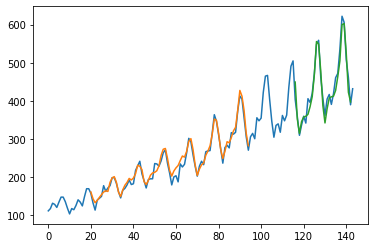

In [16]:
#@title Default title text
# LSTM for international airline passengers problem with window regression framing

look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(f"trainX.shape:{trainX.shape}")
print(f"testX.shape:{testX.shape}")

print(f"trainY.shape:{trainY.shape}")
print(f"testY.shape:{testY.shape}")

model = Sequential()
model.add(LSTM(4, input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')     #Configura el modelo para entrenar
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


print(model.summary())

#plot_model(model, to_file="/content/gdrive/My Drive/Colab Notebooks/model_LSTM.png", show_shapes=True, show_layer_names=True)

# Realizar predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Aplicar escalar original
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calcular la raiz del error cuadrado medio
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#RMSE = raiz del error cuadrado medio
print('Train Score: %.2f RMSE' % (trainScore))


testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()